v3 评审老师好：
1. 3个建议已经修改完成，请老师审阅。
1. 还有个问题想请教一下：在这个项目里Decision Tree Regressor Complexity Performance画图出来发现，trainging的std数据非常小，随着数据的增多几乎就是0。而testing的随着数据增多反而波动没有什么变化（可以理解是数据在多于一定量之后模型的表现趋于稳定了么？）。实际中会不会有些数据，在trainging的std上也不会收敛到接近0，还是都会趋于0呢？

v2 评审老师好：

已经修改相关内容，并且将建议做了记录，审核点如下，标记/Q/的还请老师指点：
1. /Q1/ 之前笔误了，代码中是:.2f（模版中就是这样的），具体代码还在Q1处，还请老师给看看。
1. /Q4/ 在健壮性那里虽然做了补充，但是在没有新数据的情况下，怎样提高模型的健壮性还是没有什么思虑，请老师指点。
1. 其他内容已经更新。

v1 评审老师好：

第一版拖拖拉拉一周才完成，辛苦老师审阅。另外在做的过程中有几个问题，都写在了答案相关的位置，汇总如下，请老师评审时候给些建议。
ps：本地完成python3.6.7，matplotlib 2.2.3

Q1：（编程练习1）请问老师怎么解决format的输出定制格式问题。
Q2: （问题9）请问老师这里如何考虑选择合适的cv？
Q3:（问题13）请问下老师，像sklearn的boston数据集的X在官方说明里并没有解释每个feature是什么，这样直接做回归预测，总感觉有些奇怪，请问在实际场景中有很多这样的情况么？感觉个人对feature如果不理解，对于分析的直觉或者感觉会比较盲目。

# 机器学习工程师纳米学位
## 模型评价与验证
## 项目 1: 预测波士顿房价


欢迎来到机器学习的预测波士顿房价项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 导入数据
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的 Python 库。如果成功返回数据集的大小，表示数据集已载入成功。

In [3]:
# disable warning
import warnings
warnings.filterwarnings('ignore')

# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# 导入visual时候matplotlib3.0会报错，升级到3.0.1解决
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


---
## 第二步. 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在 `features` 和 `prices` 两个变量名中。

### 编程练习 1：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了 ` NumPy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算 `prices` 中的 `'MEDV'` 的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [4]:
# 不知道是否和版本有关系
!pip freeze | grep python

ipython==7.1.1
ipython-genutils==0.2.0
python-dateutil==2.7.5


In [43]:
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [102]:
# v2更新 /format的输出方法/
## 得出column，输出为indexes
dcol = data.columns
## 这个是可以迭代的
for i in dcol:
    print(i)
    
## data.min的输出也可以迭代
minimum_price = data.min()
for i in minimum_price:
    print(i)

RM
LSTAT
PTRATIO
MEDV
3.5610000000000004
1.98
12.6
105000.0


In [116]:
## 设定要循环的list
dcol_list = dcol.tolist()

## 使用enumerate输出
for i, v in enumerate(minimum_price):
    print("{:<20}".format(dcol_list[i]), end='')
    print("${:.2f}".format(v)) 

RM                  $3.56
LSTAT               $1.98
PTRATIO             $12.60
MEDV                $105000.00


In [138]:
## 函数化
def float2(data, string):
    dcol_list = dcol.tolist()
    print("{:-<64}".format(string))
    for i, v in enumerate(data):
        print("{:<20}".format(dcol_list[i]), end='')
        print("${:.2f}".format(v)) 

In [146]:
# TODO: Minimum price of the data
minimum_price = data.min()
# print(type(minimum_price))
# 从上述输出可以看出来np.min并不会转换dataframe的格式
# np.array(std_price)可以转换

# TODO: Maximum price of the data
maximum_price = data.max()

# TODO: Mean price of the data
mean_price = data.mean()

# TODO: Median price of the data
median_price = data.median()

# TODO: Standard deviation of prices of the data
std_price = data.std()

# Show the calculated statistics
print("\nStatistics for Boston housing dataset:")
float2(minimum_price, "\nMinimum price:")
float2(maximum_price, "\nMaximum price:") 
float2(mean_price, "\nMean price:")
float2(median_price, "\nMedian price:")
float2(std_price, "\nStandard deviation of prices:")

# print("Standard deviation of prices: ${:.2f}".format(np.array(std_price)))
# 在python3中，对于series调用format字符串进行.2f格式会报错（不支持）
# 将.2f去掉可以输出前面的：的前面是选定后面format的元素如果是{：}就是选中所有元素
# nd.array可以通过将后面变成str解决这整数的输出
# https://pyformat.info/ 有很详细的解释
# https://www.cnblogs.com/lvcm/p/8859225.html
### /updated/ 但是后面r2那里就可以使用，原因并不是因为那个是array的数据，而是r2只是一个值
### 另外{:,.2f}的，是分隔符的意思：1，000，300这样

# /评审老师的反馈/ 这里既然题目要求了，还是要严格按照题目要求来执行。并不是我们对NumPy有偏好，我们希望通过这里让你了解：虽然他们在大部分时候得出的结果相同，但是在某些情况下，例如这里的求标准差的计算上，是不一样的。具体区别可以查看他们的文档：
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html?highlight=std#pandas.DataFrame.std
# 提示比如：
# minimum_price = prices.min()
# 可以修改为
# minimum_price = np.min(prices)
# 关于你的问题，这里format是针对的一个series，而.2f是对float的一个format方式，所以这里不能直接使用。
# 用np.set_printoptions(precision=2, suppress=True)可以设置全局的numpy array打印类型，但是建议不要这样，最好是通过循环来format str达到你的目的。
# 总结，根据连个std的说明链接可以看到，dataframe返回的是一个series, 所以不通用

# lastline：已经通过上面函数的方式解决


Statistics for Boston housing dataset:

Minimum price:-------------------------------------------------
RM                  $3.56
LSTAT               $1.98
PTRATIO             $12.60
MEDV                $105000.00

Maximum price:-------------------------------------------------
RM                  $8.40
LSTAT               $37.97
PTRATIO             $22.00
MEDV                $1024800.00

Mean price:----------------------------------------------------
RM                  $6.24
LSTAT               $12.94
PTRATIO             $18.52
MEDV                $454342.94

Median price:--------------------------------------------------
RM                  $6.18
LSTAT               $11.69
PTRATIO             $19.10
MEDV                $438900.00

Standard deviation of prices:----------------------------------
RM                  $0.64
LSTAT               $7.08
PTRATIO             $2.11
MEDV                $165340.28


### 问题 1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的业主属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

### 问题 1 - 回答：

- RM 与价格正相关
    - 按常识推断，应该和房屋价格有关系，房屋多面积就大
    - 但是可能和房子的建筑风格，建筑年代有关系
    - 数据中无此两类内容，可以扩展研究
- LSTAT 与价格负相关
    - 低收入比率越高则房屋越便宜
    - 但是对于收入划分如果有更多内容更好
    - 比如是不是还有无收入的比率，或者别的收入比率是怎样的
- PTRATIO 无法评判
    - 虽然低收入学公立学校老师学生比例应该更小
    - 但教育体系比较复杂，还是观察数据为主

---
## 第三步. 建立模型
在项目的第三步中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 编程练习2：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[决定系数](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

$R^2$ 的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的 $R^2$ 值为0还不如直接用**平均值**来预测效果好；而一个 $R^2$ 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。模型也可能出现负值的 $R^2$，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。

在下方代码的 `performance_metric` 函数中，你要实现：
- 使用 `sklearn.metrics` 中的 [`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 来计算 `y_true` 和 `y_predict` 的 $R^2$ 值，作为对其表现的评判。
- 将他们的表现评分储存到 `score` 变量中。

In [147]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# set classifier
classifier = LinearRegression

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### 问题 2 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示1**：运行下方的代码，使用 `performance_metric` 函数来计算 `y_true` 和 `y_predict` 的决定系数。

**提示2**：$R^2$ 分数是指可以从自变量中预测的因变量的方差比例。 换一种说法：

* $R^2$ 为0意味着因变量不能从自变量预测。
* $R^2$ 为1意味着可以从自变量预测因变量。
* $R^2$ 在0到1之间表示因变量可预测的程度。
* $R^2$ 为0.40意味着 Y 中40％的方差可以从 X 预测。

In [148]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {}.".format(score))

Model has a coefficient of determination, R^2, of 0.9228556485355649.


### 问题 2 - 回答:
- 答案是肯定的
    - 因为R^2达到了0.92，比较接近1，说明可预测度比较高。

### 编程练习 3: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

* 使用 `sklearn.model_selection` 中的 `train_test_split`， 将 `features` 和 `prices` 的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；
* 将分割后的训练集与测试集分配给 `X_train`, `X_test`, `y_train` 和 `y_test`。

In [149]:
# 此处会报futrue warning
# 课程中使用drop生成feature的方法更好
# X = data.loc[:,['RM','LATAT','PTRATIO']]

In [150]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
# train_test_split默认test_size=0.25, random_state默认是None，会保持和nupy的randomseed一致
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.25, random_state=42)

# Success
print("Training and testing split was successful.")
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Training and testing split was successful.


((366, 3), (123, 3), (366,), (123,))

### 问题 3 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

### 问题 3 - 回答:
- 机器学习有一条不能违背的原则：不能把测试数据用于运算。
    - 原因就像考前看到考试前，把答案背下来就能得高分
    - 如果训练时看到了测试数据，训练模型会根据这些数据做fit
    - 再用fit之后的结果去套test数据肯定会高分
- 但是把数据集分为训练集和测试集又会带来新的问题：
    - 用于训练的数据变少了
        - 一般是20%留出来作为测试数据，train_test_split默认留33%
        - 如果考虑到train-validation-test 的 60-20-20划分则会更少
        - 可以使用k折叠的方式可以将train-validation的数据利用起来

---
## 第四步. 分析模型的表现
在项目的第四步，我们来看一下不同参数下，模型在训练集和验证集上的表现。这里，我们专注于一个特定的算法（带剪枝的决策树，但这并不是这个项目的重点），和这个算法的一个参数 `'max_depth'`。用全部训练集训练，选择不同`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。画出模型的表现来对于分析过程十分有益。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观得显示了随着训练数据量的增加，模型学习曲线的在训练集评分和验证集评分的变化，评分使用决定系数 $R^2$。曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

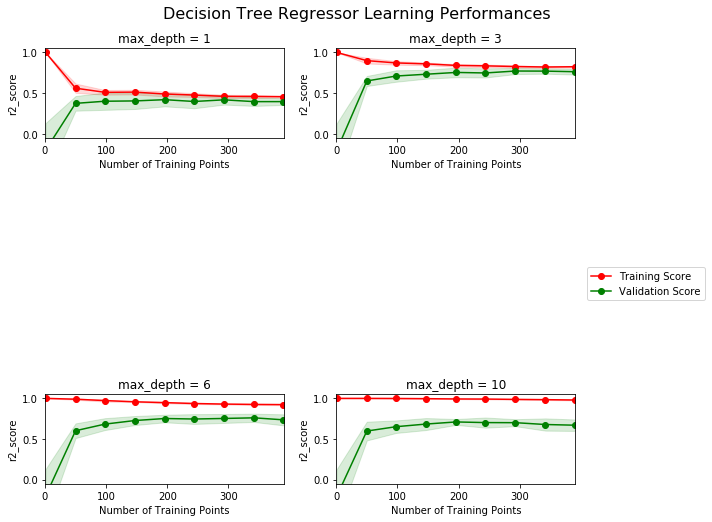

In [151]:
#from matplotlib import path
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)
# 图比较怪，但在空间中就没有问题，请问是怎么回事

### 问题 4 - 学习曲线
* 选择上述图像中的其中一个，并给出其最大深度。
* 随着训练数据量的增加，训练集曲线的评分有怎样的变化？验证集曲线呢？
* 如果有更多的训练数据，是否能有效提升模型的表现呢？

**提示：**学习曲线的评分是否最终会收敛到特定的值？一般来说，你拥有的数据越多，模型表现力越好。但是，如果你的训练和测试曲线以高于基准阈值的分数收敛，这是否有必要？基于训练和测试曲线已经收敛的前提下，思考添加更多训练点的优缺点。

### 问题 4 - 回答:
- 右上角的max-depth为3的参数最优
    - depth1 为欠拟合状态，训练集的得分都很低
    - depth6，10 为过拟合状态，训练姐和测试集在右侧仍然相差较大
- 数据量的变化：
    - 数据量50之前是明显的欠拟合状态
    - 从100到300逐渐逼近
    - 300之后变化不明显

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练集的变化，一个是验证集的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

**运行下方区域中的代码，并利用输出的图形并回答下面的问题5与问题6。**

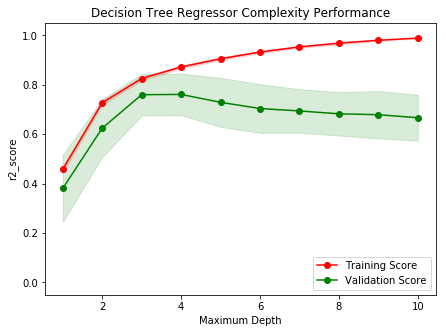

In [152]:
vs.ModelComplexity(X_train, y_train)
# 这里和后面k=10 fold的图不同，需要检查两个函数的区别
# 感觉这里validation的variation很大

### 问题 5 - 偏差（bias）与方差（variance）之间的权衡取舍
* 当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？
* 当模型以最大深度10训练时，情形又如何呢？
* 图形中的哪些特征能够支持你的结论？
  
**提示：** 高偏差表示欠拟合（模型过于简单），而高方差表示过拟合（模型过于复杂，以至于无法泛化）。考虑哪种模型（深度1或10）对应着上述的情况，并权衡偏差与方差。

### 问题 5 - 回答:

- 当模型过于简单，虽然泛化良好，但与实际的偏差较大，无法有效预测。
- 当模型过于复杂，虽然能够很好的匹配训练数据，一旦更换数据（使用测试数据跑）就会得分很差，也无法有效预测，泛化性能很差。
- 适合的权衡应该是：
    - 泛化能力好：随着数据点的增加，训练的数据和测试的数据应该比较接近。
    - 与实际值比较接近：测试集和数据集的得分要比较优（相比其他的参数更接近1）

### 问题 6- 最优模型的猜测
* 结合问题 5 中的图，你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？
* 你得出这个答案的依据是什么？

**提示**：查看问题5上方的图表，并查看模型在不同 `depth`下的验证分数。随着深度的增加模型的表现力会变得更好吗？我们在什么情况下获得最佳验证分数而不会使我们的模型过度复杂？请记住，奥卡姆剃刀：“在竞争性假设中，应该选择假设最少的那一个。”

### 问题 6 - 回答:

- 要想回答这个问题要得到各个depth的score并且比较
- 上面作图的是调用项目中的def完成的，但是没有分数输出
- 下面做一个简化版本的score过程并输出数值做对比
- （根据后面分析）答案：
    - depth = 4最佳
    - 因为 depth = 4的时候validation score最高

In [153]:
# import libs
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as pl

# 设定cv 3个参数是折叠的次数、测试集比率、随机stat设置
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

# Vary the max_depth parameter from 1 to 10
max_depth = np.arange(1,11)

X = features
y = prices

# Calculate the training and testing scores
train_scores, valid_scores = validation_curve(DecisionTreeRegressor(), X, y, \
    param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html

# 因为是fold了10次，而且用1-10 depth进行测试，所以train和test结果是10*10的矩阵
print(train_scores.shape)
print(valid_scores.shape)

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

print(train_mean)
print(valid_mean)

(10, 10)
(10, 10)
[0.45654089 0.72757636 0.82516625 0.86900889 0.89689463 0.92375857
 0.94426921 0.96059009 0.97255926 0.98131886]
[0.39602816 0.66550336 0.7637292  0.7982105  0.77060461 0.74037766
 0.73299888 0.69213031 0.67359326 0.6745218 ]


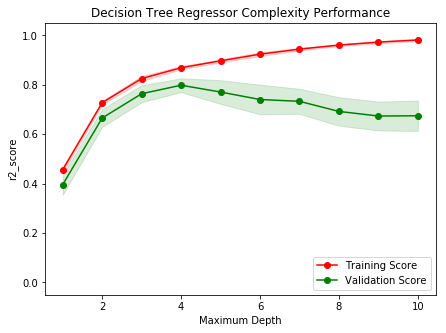

In [154]:
# 查了一些资料说对于bias和variations的trade-off可以根据：
# 对期望泛化误差
# MSE(x) = var(x) + bias2(x) + ϵ2
# 来考量
# 这里的validation curve已经是用r2，而r2实际上已经包含了MSE的衡量
# 那么接下来就是对train和test的输出score做比较了
# 其实看图可以出来的
# Plot the validation curve
pl.figure(figsize=(7, 5))
pl.title('Decision Tree Regressor Complexity Performance')
pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
pl.plot(max_depth, valid_mean, 'o-', color = 'g', label = 'Validation Score')
pl.fill_between(max_depth, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
pl.fill_between(max_depth, valid_mean - valid_std, \
    valid_mean + valid_std, alpha = 0.15, color = 'g')
    
# Visual aesthetics
pl.legend(loc = 'lower right')
pl.xlabel('Maximum Depth')
pl.ylabel('r2_score')
pl.ylim([-0.05,1.05])
pl.show()

In [155]:
# 从上图中，觉得degree=3和degree=4比较适合，因为
## 1.validation score比较高
## (2.两个score相差不是很大)经测试这个是不用考虑的，因为第一个是最低的
# 所以比较的方式是：
## 1.validation score最高
## 2.validation score最高的时候两个score差值最小
diffs = (train_mean - valid_mean)
best_valid = valid_mean.max()
best_valid_index = np.argmax(valid_mean)
diffs_min = diffs.min()
diffs_min_index = np.argmin(diffs)
best_valid, best_valid_index, diffs_min, diffs_min_index

(0.7982105000799767, 3, 0.06051272743796693, 0)

---
## 第五步. 评估模型的表现
在项目的最后一节中，你将构建一个模型，并使用 `fit_model` 中的优化模型去预测客户特征集。

### 问题 7- 网格搜索（Grid Search）
* 什么是网格搜索法？
* 如何用它来优化模型？

**提示**：在解释网格搜索算法时，首先要理解我们为什么使用网格搜索算法，以及我们使用它的最终目的是什么。为了使你的回答更具有说服力，你还可以给出一个模型中可以使用此方法进行优化参数的示例。

### 问题 7 - 回答:
- 当有算法有多个参数的时候（比如SVM）多个参数就形成了引Hypter-parameters，即参数的组合。
- 多个参数的组合会形成2维数组的形式，可以使用Grid Search分别计算并将结果展示为矩阵。
- 在参数非常多的时候，结果太多不利于观察，直接使用best_estimator_得到最好的参数。

### 问题 8 - 交叉验证
- 什么是K折交叉验证法（k-fold cross-validation）？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 是如何结合交叉验证来完成对最佳参数组合的选择的？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 中的`'cv_results_'`属性能告诉我们什么？
- 网格搜索为什么要使用K折交叉验证？K折交叉验证能够避免什么问题？

**提示**：在解释k-fold交叉验证时，一定要理解'k'是什么，和数据集是如何分成不同的部分来进行训练和测试的，以及基于'k'值运行的次数。
在考虑k-fold交叉验证如何帮助网格搜索时，你可以使用特定的数据子集来进行训练与测试有什么缺点，以及K折交叉验证是如何帮助缓解这个问题。

### 问题 8 - 回答：
- k-fold cross-validation是模拟将所有数据进行k次分隔，每次选取k分之一作为测试数据，其他剩余的作为训练数据的方法，最后将k次分隔的结果取平均数作为输出结果的方法。
- /updated v2/: 更准确的解释是：将训练数据分成k份。
- 这种方式可以利用所有数据，而且当数据不多的时候可以有效排除测试数据随机选择带来的影响。
- GridSearchCV是对这个方法的代码实现。主要参数有3个(clf, parameters, scoring=scorer, cv=5)
    - clf是算法模型，parameters是要用GridSearch进行尝试的参数矩阵，socring是评分方法，cv是折叠次数
    - cv默认等于3，但是在后续会调整为默认为5，所以官方会有future warning提醒设置cv，避免影响之后的结果
    - 评分方式应该根据clf选择，选择错了会不适用报错
    - https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
- cv_results_是将所有GridSearchCV测试的结果用dict格式做输出，可以转化成dataframe输出比较美观。
- /updated v2/：网格搜索为什么要使用K折交叉验证？K折交叉验证能够避免什么问题？
    - 其实网格搜索和K折交叉验证解决的是两个问题：
    - 网格搜索解决的是很多参数进行矩阵式搜索的问题（避免人工一次次跑不同参数的繁琐）
    - K折交叉验证解决的是对数据集的有效利用的问题（根据大数定理，数据越多接近越接近真实值）
    - 这两种方式在机器学习中都是最佳实践，所以经常绑在一起实现了。
    
- /v1老师的反馈/：
从普适性的角度来讲，一般5折、10折是较为常用的cv方式，如果数据量特别大，从效率出发3折也是常用的切分方法。这里也是一种trade off，基本的原则就是保证进行一定的交叉验证，同时也保证validation切分出来有足够的数据量。像你遇到的这种不同cv选取结果有差异的情况跟数据量也有一定的关系，并且4和5的深度表现差异也不是很大，当数据足够的情况下，结果还是会相对稳定的。

当然，如果是完全metric driven（比如一些比赛）来讲，等比与training sets : test sets的比值来切分做cv是表现最为稳定和一致的。

### 编程练习 4：拟合模型
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

另外，你会发现在实现的过程中是使用`ShuffleSplit()`作为交叉验证的另一种形式（参见'cv_sets'变量）。虽然它不是你在问题8中描述的K-fold交叉验证方法，但它同样非常有用！下面的`ShuffleSplit()`实现将创建10个('n_splits')混洗集合，并且对于每个混洗集，数据的20％（'test_size'）将被用作验证集合。当您在实现代码的时候，请思考一下它与`K-fold cross-validation`的不同与相似之处。

请注意，`ShuffleSplit` 在 `Scikit-Learn` 版本0.17和0.18中有不同的参数。对于下面代码单元格中的 `fit_model` 函数，您需要实现以下内容：

1. **定义 `'regressor'` 变量**: 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数;
2. **定义 `'params'` 变量**: 为 `'max_depth'` 参数创造一个字典，它的值是从1至10的数组;
3. **定义 `'scoring_fnc'` 变量**: 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数。将 `‘performance_metric’` 作为参数传至这个函数中；
4. **定义 `'grid'` 变量**: 使用 `sklearn.model_selection` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 创建一个网格搜索对象；将变量`'regressor'`, `'params'`, `'scoring_fnc'`和 `'cross_validator'` 作为参数传至这个对象构造函数中；

  
如果你对 Python 函数的默认参数定义和传递不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [156]:
# 开始运算前的扩展：
## 本地sklearn版本，查询scikit：
!pip freeze | grep scikit
## 本地的是conda安装的话，conda也有输出
# !conda list | grep scikit

scikit-learn==0.20.0


In [157]:
# 不同的模型要用不同的merics来衡量，官方文档讲的很详细
# https://scikit-learn.org/stable/modules/model_evaluation.html

# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=42)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=42)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    # /updated v2/ 之前理解错了，需要传入cv_sets参数，就不会出现cv=3和cv=5的误差了
    # /v1 vertion/ grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=5)
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## 第六步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 9 - 最优模型
*最优模型的最大深度（maximum depth）是多少？此答案与你在**问题 6**所做的猜测是否相同？*

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [158]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


### 问题 9 - 回答：
- 按照默认参数cv=3，得出的是depth = 5 与第6步不同。
- 原因可能和k折叠的设置不同。
- 也为了避免futrue warining，将cv设置成5。结果变成了4，一致了。
/done/Q2:请问老师这里如何考虑选择合适的cv？
- 调用cv_sets 中的n=10分隔以后答案就统一了

### 问题 10 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

* 你会建议每位客户的房屋销售的价格为多少？
* 从房屋特征的数值判断，这样的价格合理吗？为什么？

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你优化的模型来为每位客户的房屋价值做出预测。

In [159]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $416,788.24
Predicted selling price for Client 2's home: $238,782.35
Predicted selling price for Client 3's home: $931,636.36


### 问题 10 - 回答：
- 建议的价格分别是 417k， 239k，932k
- 价格是合理的，从给定数值看：
    - 价值是从房屋最少到最多的依次增长
    - 从贫困阶层邻居从多到少依次增长
    - 从老师和学生比率从少到多依次增长
- 再对比下前面describe的输出信息：
    - 从room考虑吻合。8个room - 932k和最高8.4个-1025比较一致（举例高房价）
    - 从教师学生比例指标考虑吻合。17比1-416k和中位数的19比1-439k比较一致，但有少量低估，可以向上调整一点价格（举例中房价）
    - 从周围低收入比例考虑吻合。（从数据中只能看出高和中的例子是否合适，因为这两个和max，median比较接近，可以参考。但是低收入的没有比较接近的无法判断）

In [179]:
data[(data.MEDV > 234000) & (data.MEDV < 245000) ].mean()

RM              5.463
LSTAT          22.225
PTRATIO        20.200
MEDV       239400.000
dtype: float64

- 根据以上两个筛选结果，对于低价值房屋：
    - 低收入比率，22% - 32%（明显低于数据值）
    - 教师学生比率，20 - 22 (基本吻合）
    - 房间数， 5.5 - 4（明显少于）
    
 **结论：**
 - 高价值的按照预测卖
 - 中价值的按照预测多一点点卖
 - 低价值的按照预测减少一些卖。当然根据对比，也可以把这个房子卖给看中教师学生比率的买家（奸商，，，，，）

### 编程练习 5
你刚刚预测了三个客户的房子的售价。在这个练习中，你将用你的最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 $R^2$ 的值。

**提示：**
* 你可能需要用到 `X_test`, `y_test`, `optimal_reg`, `performance_metric`。
* 参考问题10的代码进行预测。
* 参考问题2的代码来计算R^2的值。


In [180]:
# TODO Calculate the r2 score between 'y_true' and 'y_predict'
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(type(r2))
print("Optimal model has R^2 score {:,.2f} on test data".format(r2))

<class 'numpy.float64'>
Optimal model has R^2 score 0.82 on test data


### 问题11 - 分析决定系数

你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？

### 问题11 - 回答
- 从r2决定性系数为0.81来讲，还是不错的。
- 有几点还需要注意：
    - 有些对r2的反对意见，认为有些别的指标会更好，后续研究
    - http://blog.minitab.com/blog/adventures-in-statistics-2/how-high-should-r-squared-be-in-regression-analysis
    - http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-tutorial-and-examples
    - 模版中并没有做多重线性VIF的分析，feature中可能会有相关项

### 模型健壮性

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。

### 问题 12 - 模型健壮性

模型是否足够健壮来保证预测的一致性？

**提示**: 执行下方区域中的代码，采用不同的训练和测试集执行 `fit_model` 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [161]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $390,250.00
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $30,372.22


### 问题 12 - 回答：
- 这里有波动，又回到了bias-variavariance权衡的问题
- 关于robustness健壮性，是衡量机器学习算法的。涉及2方面：
    1. 对于噪音是否能够容忍（噪音的影响有多大）
    1. 模型是否过于简单或复杂（欠拟合和过拟合）
- /Q4/对于健壮性的评测，感觉还是要看测试集的分数，但是调优的话还没什么思路，请老师指点指点。
- 这里是用vs里的函数进行10次分隔数据后的fit，最大最小误差在预测值5%-10%之间
- 我感觉结果马马虎虎，虽然在10%以下，但是对于房屋这么大价值的商品来讲，还是比较多的金额
- 但是反过来说，顾客是否喜欢一个房屋还是有很大主观在里面的，波动比较大还是有些道理
- 结合后面的实用性探讨，如果能有更多feature或者数据，将可以降低这个误差范围
- 一个资料，后续研究：https://papers.nips.cc/paper/5872-efficient-and-robust-automated-machine-learning.pdf

- /v2更新/ 翻到一篇文章https://www.kdnuggets.com/2018/08/make-machine-learning-models-robust-outliers.html 总的理解就是：健壮性是就机器学习中模型对于噪音的容忍程度。
    - 首先，在训练的时候应该尽量去除掉异常值
    - 其次在选择模型的时候应该选择受异常值干扰较少的模型（看数据case）
    - 在测试的时候，不用考虑异常值，因为如果异常值也能判断对了，那才是不对的
    - 综上，本项目的预测波动小于10%，还算比较健壮的了。
    

### 问题 13 - 实用性探讨
*简单地讨论一下你建构的模型能否在现实世界中使用？* 

提示：回答以下几个问题，并给出相应结论的理由：
- *1978年所采集的数据，在已考虑通货膨胀的前提下，在今天是否仍然适用？*
- *数据中呈现的特征是否足够描述一个房屋？*
- *在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？*
- *你觉得仅仅凭房屋所在社区的环境来判断房屋价值合理吗？*

### 问题 13 - 回答：
- 时间跨度有40年，值得怀疑，需要找找其他的数据做对比
- plus data 1 - sklearn dataset boston
- plus data 2 - kaggle 上面有和课程中一样的数据，突然发现这个项目的内容，等完成后再参考:https://www.kaggle.com/samratp/boston-housing-prices-evaluation-validation
- sklearn自带的data后面有很多应用，多种多样，非常值得参考 https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
- /done/ Q3:请问下老师，像sklearn的boston数据集的X在官方说明里并没有解释每个feature是什么，这样直接做回归预测，总感觉有些奇怪，请问在实际场景中有很多这样的情况么？感觉个人对feature如果不理解，对于分析的直觉或者感觉会比较盲目。
- /updated v1/ 评审老师的反馈：
你回答的很好。 实际的场景也需要更多的考虑问题本身的可能影响因素，再去收集更多的数据，不能只是用手里的数据就去得出一个最终的结论。

关于你提到的问题，在实际的问题中肯定是不会出现自己对x不知道是什么含义的，所以不会遇到盲目去调参的情况。
当然这里有个特殊的情况，就是数据挖掘比赛，有些比赛为了用户隐私会规避掉一些实际字段的含义。但是也有些情况你是不能完全了解每个feature的含义的，比如虽然知道每个x的含义，但是可能做了hash、降维、embedding等操作之后，就不知道每个维度的特征具体指代的内容是什么了。这种情况应该多去利用数据本身的分布，去构造特征，比如做数据分桶、特征交叉等。

另外如果知道特征的含义，应该多去结合实际这个特征跟label在逻辑上的含义去进行上述的操作。

In [162]:
from sklearn.datasets import load_boston
sklearn_boston = load_boston()
sklearn_boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [163]:
sklearn_boston.target[0]

24.0

## 第七步.完成和提交

当你完成了以上所有的代码和问题，你需要将 iPython Notebook 导出 HTML，导出方法：在左上角的菜单中选择 **File -> Download as -> HTML (.html)**。当你提交项目时，需要包含**可运行的 .ipynb 文件**和**导出的 HTML 文件**。

In [ ]:
# archive 看到一个用法，后续研究：
#with pd.option_context('float_format', '{:.2f}'.format):
    #print(features.describe())